Import Library

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Masukkan Datasets

In [89]:
df = pd.read_csv(r"C:\Users\ukasy\project ML\Study Group\data preprocessing\Tugas GDOC_Data Preprocessing\Datasets\MBP.csv", na_values=['NA'])

df['ROM/Storage'].value_counts()


ROM/Storage
128 GB ROM               689
64 GB ROM                401
32 GB ROM                210
256 GB ROM               189
4 MB ROM                  41
16 GB ROM                 33
8 GB ROM                  15
32 MB ROM                 13
128 MB ROM                11
Expandable Upto 32 GB      8
0.125 GB ROM               8
4 GB ROM                   7
16 MB ROM                  7
Expandable Upto 16 GB      5
48 MB ROM                  5
512 GB ROM                 4
100 MB ROM                 2
153 MB ROM                 2
2.27 MB ROM                2
10 MB ROM                  2
Expandable Upto 8 GB       2
NA KB ROM                  1
0 GB ROM                   1
2 MB ROM                   1
NA ROM                     1
100 KB ROM                 1
20 MB ROM                  1
Name: count, dtype: int64

Sample datasets & hapus kolom yg tidak penting

In [90]:
list_cols = df.columns.to_list()
cols_delete = ['Date of Scraping']
df.drop(cols_delete, axis=1, inplace=True)
df.sample(5)


,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
893,"vivo T2 5G (Nitro Blaze, 128 GB)",4.5,"22,618",6 GB RAM,128 GB ROM,64 MP (OIS) + 2MP,16MP Front Camera,4500 mAh,Snapdragon 695 Processor,"₹18,999"
1707,"Lenovo K9 (Black, 32 GB)",4.2,"17,887",3 GB RAM,32 GB ROM,13MP + 5MP,13MP + 5MP Dual Front Camera,3000 mAh,MediaTek P22 Processor,"₹9,999"
1084,"vivo X60 (Shimmer Blue, 256 GB)",4.4,"1,077",12 GB RAM,256 GB ROM,48MP + 13MP + 13MP,32MP Front Camera,4300 mAh,Qualcomm Snapdragon 870 Processor,"₹36,600"
1220,"Mi 4i (Yellow, 16 GB)",4.2,"80,951",2 GB RAM,16 GB ROM,13MP Rear Camera,5MP Front Camera,3030 mAh,2nd-gen Snapdragon 615 64-bit octa-core Processor,"₹12,999"
140,"realme 10 Pro 5G (Nebula Blue, 128 GB)",4.3,"24,728",6 GB RAM,128 GB ROM,108MP + 2MP,16MP Front Camera,5000 mAh,Qualcomm Snapdragon 695 5G Processor,"₹18,999"


Ubah tipe data ke numerik

In [91]:
df['Front Camera'].value_counts()

Front Camera
16MP Front Camera               332
8MP Front Camera                307
5MP Front Camera                273
12MP Front Camera               121
32MP Front Camera               102
13MP Front Camera                70
20MP Front Camera                57
7MP Front Camera                 27
32MP + 8MP Dual Front Camera     15
50MP Front Camera                15
20MP + 2MP Dual Front Camera     14
44MP Front Camera                11
10.8MP Front Camera               9
2MP Front Camera                  9
25MP Front Camera                 8
10MP Front Camera                 8
50MP + 8MP Dual Front Camera      8
0.3MP Front Camera                7
16MP + 2MP Dual Front Camera      6
60MP Front Camera                 5
44MP + 2MP Dual Front Camera      5
4MP Front Camera                  4
60 MP with OIS                    3
16MP + 8MP Dual Front Camera      3
8MP + 2MP Dual Front Camera       3
24MP Front Camera                 3
32MP + 2MP Dual Front Camera      2
1.6MP Front Cam

In [92]:
NA_mask =  df['RAM'].str.contains('NA', na=False)
df_NA = df[NA_mask]

df_A = df[~df['Battery'].str.contains('mAh', na=False)]
df_A

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
720,SAMSUNG Guru FM Plus,4.2,"27,967",3.81 cm (1.5 inch) Display,NaN,1 Year Manufacturer Warranty,NaN,NaN,NaN,"₹1,500"
729,SAMSUNG GT 1200 R/I/M,4.0,870,cm Display,NaN,NaN,NaN,NaN,NaN,"₹1,699"
1389,Nokia C2-00,0.0,0,cm Display,NaN,NaN,NaN,NaN,NaN,"₹2,967"
1392,Nokia C2-00,0.0,0,cm Display,NaN,NaN,NaN,NaN,NaN,"₹2,967"
1394,Nokia 5130,3.0,4,cm Display,NaN,NaN,NaN,NaN,NaN,"₹4,819"
1395,Nokia C3,3.8,5,cm Display,NaN,NaN,NaN,NaN,NaN,"₹6,599"
1396,Nokia X-201,4.4,116,cm Display,NaN,NaN,NaN,NaN,NaN,"₹4,229"
1400,Nokia X2,0.0,0,cm Display,NaN,NaN,NaN,NaN,NaN,"₹5,359"
1401,Nokia Asha 302,3.0,5,cm Display,NaN,NaN,NaN,NaN,NaN,"₹7,999"
1402,Nokia X2,4.1,35,cm Display,NaN,NaN,NaN,NaN,NaN,"₹5,359"


In [93]:
df['RAM'] = df['RAM'].str.replace('ROM', 'RAM')

In [94]:
# RAM


TB_mask = df['RAM'].str.contains('TB', na=False)
MB_mask = df['RAM'].str.contains('MB', na=False)
GB_mask = df['RAM'].str.contains('GB', na= False)
df = df[~df['RAM'].str.contains('Expandable', na=False)]
df = df[~df['RAM'].str.contains('cm Display', na=False)]
df['RAM'] = df['RAM'].replace(['NA MB RAM', 'NA RAM'], np.nan)


# ROM
TB_mask_ROM = df['ROM/Storage'].str.contains('TB', na=False)
MB_mask_ROM = df['ROM/Storage'].str.contains('MB', na=False)
GB_mask_ROM = df['ROM/Storage'].str.contains('GB', na= False)
df = df[~df['ROM/Storage'].str.contains('Expandable', na=False)]
df = df[~df['ROM/Storage'].str.contains('NA', na=False)]


df.loc[TB_mask, 'RAM'] = (df.loc[TB_mask, 'RAM'].str.replace(' TB RAM', '').astype(float))*1000
df.loc[GB_mask, 'RAM'] = df.loc[GB_mask, 'RAM'].str.replace(' GB RAM', '').astype(float)
df.loc[MB_mask, 'RAM'] = (df.loc[MB_mask, 'RAM'].str.replace(' MB RAM', '').astype(float))/1000

df.loc[TB_mask, 'ROM/Storage'] = (df.loc[TB_mask_ROM, 'ROM/Storage'].str.replace(' TB ROM', '').astype(float))*1000
df.loc[GB_mask, 'ROM/Storage'] = df.loc[GB_mask_ROM, 'ROM/Storage'].str.replace(' GB ROM', '').astype(float)
df.loc[MB_mask, 'ROM/Storage'] = (df.loc[MB_mask_ROM, 'ROM/Storage'].str.replace(' MB ROM', '').astype(float))/1000

# Battery
df['Battery'] = df['Battery'].str.extract(r'(\d+)')



df.head(5)


,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2.0,32.0,8MP Dual Camera,5MP Front Camera,5000,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4.0,64.0,50MP + 2MP,8MP Front Camera,5000,Mediatek Dimensity 700 Processor,"₹11,999"
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4.0,64.0,8MP Dual Rear Camera,5MP Front Camera,5000,Helio G36 Processor,"₹6,999"
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4.0,64.0,50MP Dual Rear Camera,5MP Front Camera,5000,Mediatek Helio G85 Processor,"₹7,749"
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4.0,64.0,8MP Dual Rear Camera,5MP Front Camera,5000,Helio G36 Processor,"₹6,999"


In [95]:
# Processor

df['Processor Brand'] = df['Processor'].str.split(' ', n=1, expand=True)[0]

# Phone Name

df['Phone Brand'] = df['Phone Name'].str.split(' ', n=1, expand= True)[0]
def hitung_cam(hitung):
    if 'Dual' in hitung:
        return 2
    else:
        hitung_plus = hitung.count("+")
        return hitung_plus + 1

df['Front Camera'] = df['Front Camera'].astype(str)   
df['Jumlah Kamera Belakang'] = df['Back/Rare Camera'].apply( lambda x : hitung_cam(x))
def hitung_cam_dpn(hitung):
    if 'Dual' in hitung:
        return 2
    else:
        return 1
df['Jumlah Kamera Depan'] = df['Front Camera'].apply(lambda x : hitung_cam_dpn(x))
# df['Back/Rare Camera'] = df['Back/Rare Camera'].str.split("+", n = df['Back/Rare Camera'].count("+"), expand=True)

df.sample(5)

# Name

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Processor Brand,Phone Brand,Jumlah Kamera Belakang,Jumlah Kamera Depan
152,"realme Narzo 50 (Speed Blue, 64 GB)",4.4,"17,460",4.0,64.0,50MP + 2MP + 2MP,16MP Front Camera,5000,Mediatek Helio G96 Processor,"₹12,999",Mediatek,realme,3,1
1123,"Mi 10T (Lunar Silver, 128 GB)",4.1,"3,657",8.0,128.0,64MP + 13MP + 5MP,20MP Front Camera,5000,Qualcomm Snapdragon 865 Processor,"₹24,996",Qualcomm,Mi,3,1
1070,"vivo V21 5G (Neon Spark, 128 GB)",4.3,"17,455",8.0,128.0,64MP + 8MP + 2MP,44MP Front Camera,4000,Mediatek Dimensity 800U Processor,"₹27,990",Mediatek,vivo,3,1
6,"POCO C55 (Power Black, 64 GB)",4.2,"22,621",4.0,64.0,50MP Dual Rear Camera,5MP Front Camera,5000,Mediatek Helio G85 Processor,"₹7,749",Mediatek,POCO,2,1
824,"OPPO A55 (Mint Green, 128 GB)",4.3,"1,272",4.0,128.0,50MP + 2MP + 2MP,16MP Front Camera,5000,MediaTek Helio G35 Processor,"₹13,999",MediaTek,OPPO,3,1


Bersihkan Rating

In [96]:
rename = {
    'Rating ?/5' : 'Rating'
}

df = df.rename(columns=rename)

df['Number of Ratings'] = df['Number of Ratings'].str.replace(",", "").astype(int)
df.sample(5)

,Phone Name,Rating,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Processor Brand,Phone Brand,Jumlah Kamera Belakang,Jumlah Kamera Depan
1009,"vivo Y02 (Orchid Blue, 32 GB)",4.3,542,3.0,32.0,8MP Rear Camera,5MP Front Camera,5000,MediaTek P22 Processor,"₹12,999",MediaTek,vivo,1,1
1346,"Nokia G21 (Dusk, 128 GB)",4.0,868,6.0,128.0,50MP + 2MP + 2MP,8MP Front Camera,5050,Unisoc T606 Processor,"₹16,999",Unisoc,Nokia,3,1
1745,"Infinix HOT 20 Play (Racing Black, 64 GB)",4.4,25096,4.0,64.0,13Mp + AI Lens,8MP Front Camera,6000,MediaTek G37 Processor,"₹8,499",MediaTek,Infinix,2,1
937,"vivo Y33s (Mirror Black, 128 GB)",4.3,12835,8.0,128.0,50MP + 2MP + 2MP,16MP Front Camera,5000,MediaTek Helio G80 Processor,"₹15,999",MediaTek,vivo,3,1
137,"realme 10 Pro 5G (Dark Matter, 128 GB)",4.3,17768,8.0,128.0,108MP + 2MP,16MP Front Camera,5000,Qualcomm Snapdragon 695 5G Processor,"₹19,999",Qualcomm,realme,2,1


In [97]:
# Hapus kolom gk guna
cols_delete_2 = ['Phone Name', 'Back/Rare Camera', 'Front Camera', 'Processor']
df.drop(cols_delete_2, axis=1, inplace=True, errors='ignore')

df.sample(5)

# hapus kolom yg ada nullnya


,Rating,Number of Ratings,RAM,ROM/Storage,Battery,Price in INR,Processor Brand,Phone Brand,Jumlah Kamera Belakang,Jumlah Kamera Depan
78,4.5,244650,6.0,64.0,4000,"₹21,999",Qualcomm,POCO,2,1
1216,4.2,80951,2.0,32.0,3120,"₹14,999",2nd-gen,Mi,1,1
171,4.4,25430,3.0,32.0,5000,"₹8,999",Unisoc,realme,2,1
1202,4.2,80951,2.0,16.0,3030,"₹12,999",2nd-gen,Mi,1,1
1300,4.1,2014,0.032,0.032,800,"₹1,599",SC6531E,Nokia,1,1


In [98]:
# Hapus duplicated data

df.duplicated().sum()

df.drop_duplicates(inplace=True)

# Hapus data kosong (krna akan memengaruhi spesifikasi hp)

df.dropna(axis =0, inplace=True)

df.sample(5)


,Rating,Number of Ratings,RAM,ROM/Storage,Battery,Price in INR,Processor Brand,Phone Brand,Jumlah Kamera Belakang,Jumlah Kamera Depan
823,4.3,53573,8.0,128.0,4300,"₹29,990",MediaTek,OPPO,3,1
1336,4.3,4,3.0,32.0,5050,"₹8,999",With,Nokia,1,1
21,4.1,7285,6.0,128.0,5000,"₹15,999",Qualcomm,POCO,3,1
1548,0.0,0,12.0,256.0,4115,"₹26,990",Qualcomm®,OnePlus,2,2
771,4.2,796,4.0,64.0,5000,"₹15,499",Mediatek,OPPO,2,1


In [99]:

cols_num = ['RAM', 'ROM/Storage', 'Battery', 'Price in INR']
df[cols_num] = df[cols_num].apply(pd.to_numeric, errors= 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1049 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  1049 non-null   float64
 1   Number of Ratings       1049 non-null   int64  
 2   RAM                     1049 non-null   float64
 3   ROM/Storage             1049 non-null   float64
 4   Battery                 1049 non-null   int64  
 5   Price in INR            0 non-null      float64
 6   Processor Brand         1049 non-null   object 
 7   Phone Brand             1049 non-null   object 
 8   Jumlah Kamera Belakang  1049 non-null   int64  
 9   Jumlah Kamera Depan     1049 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 90.1+ KB


pemisahan variabel x dan y

In [100]:

y = df['Price in INR']
x = df.drop(['Price in INR'], axis=1)

Visualisasi Data % Feature Engineering


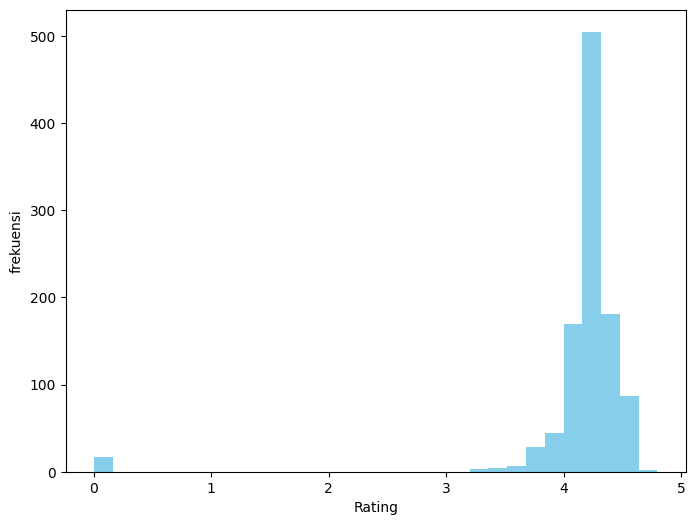

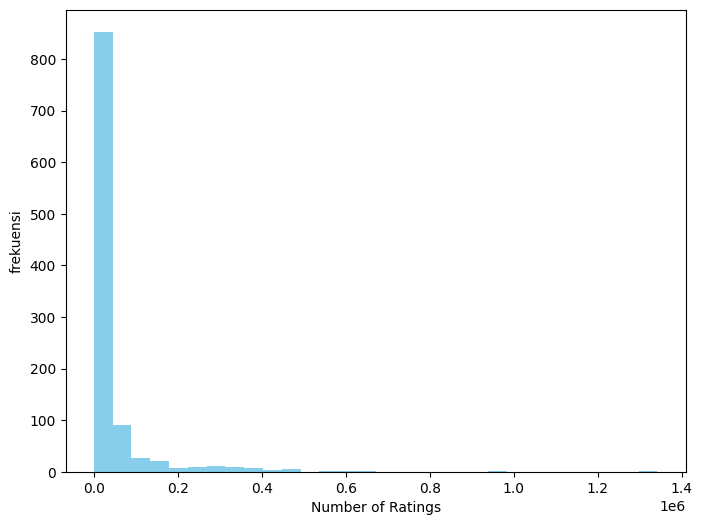

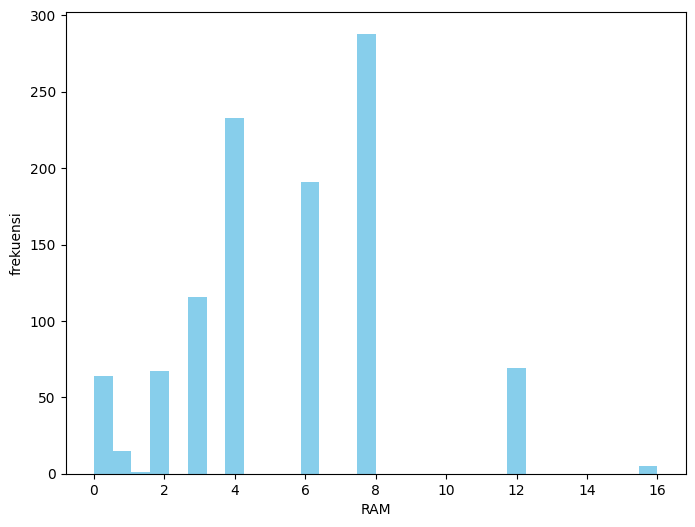

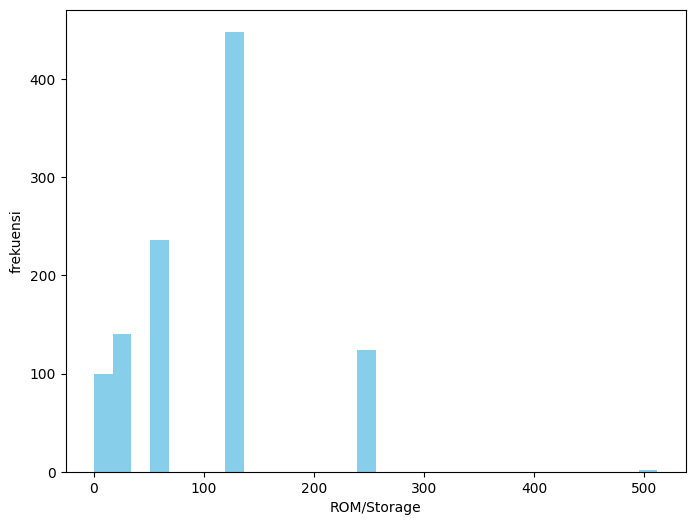

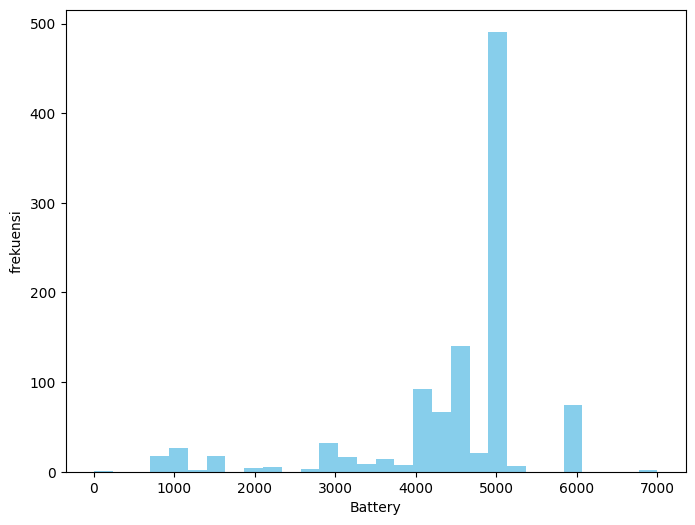

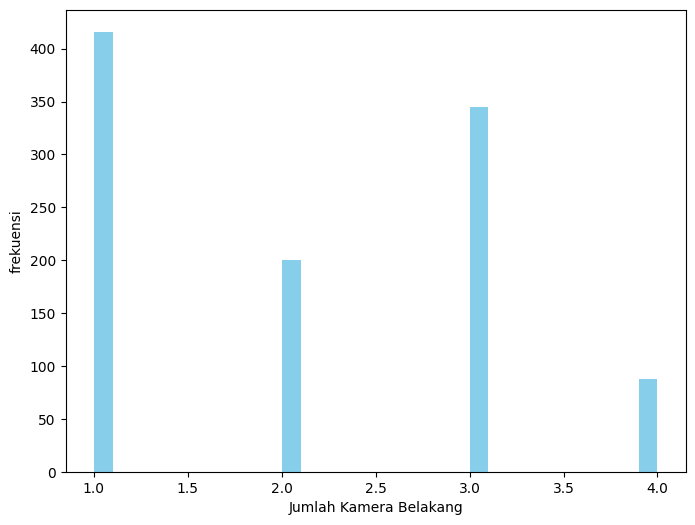

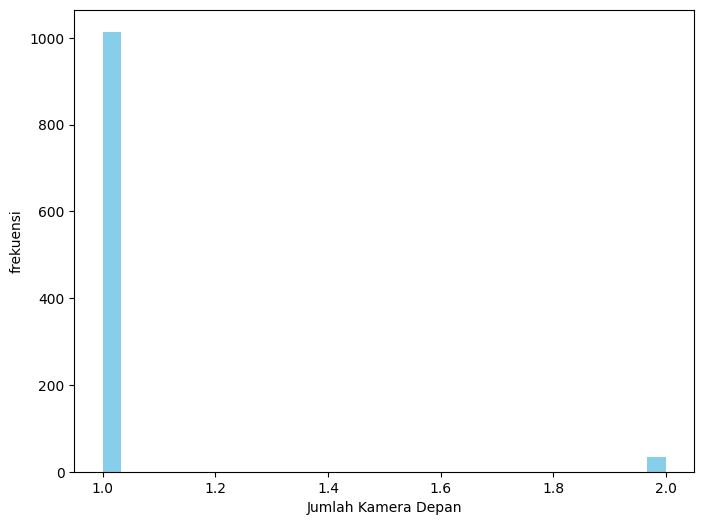

In [101]:


# Histogram
df_num = x.select_dtypes(include='number')
for column in df_num.columns:
    plt.figure(figsize=(8,6))
    plt.hist(df[column],bins=30,color='skyblue')
    plt.xlabel(f"{column}")
    plt.ylabel('frekuensi')
    plt.show()

Dapat kita lihat ada beberapa outlier di beberapa kolom, untuk menyesuikannya kita akan menggunakan minmaxsacler atau standarisasi, tapi sebelum itu kita akan menggunakan boxplot

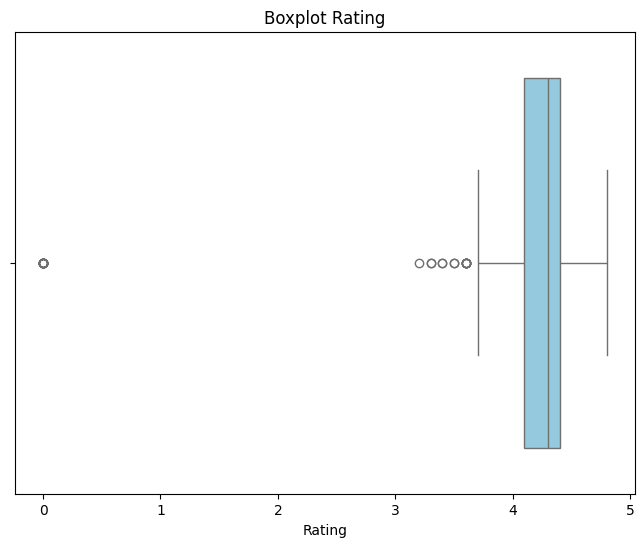

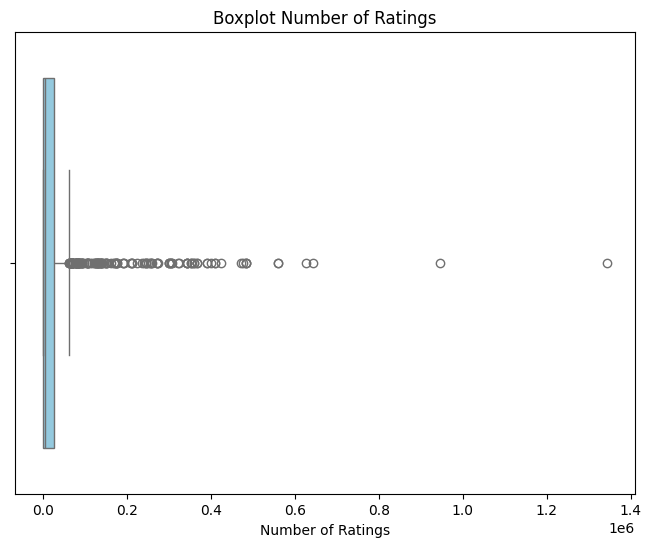

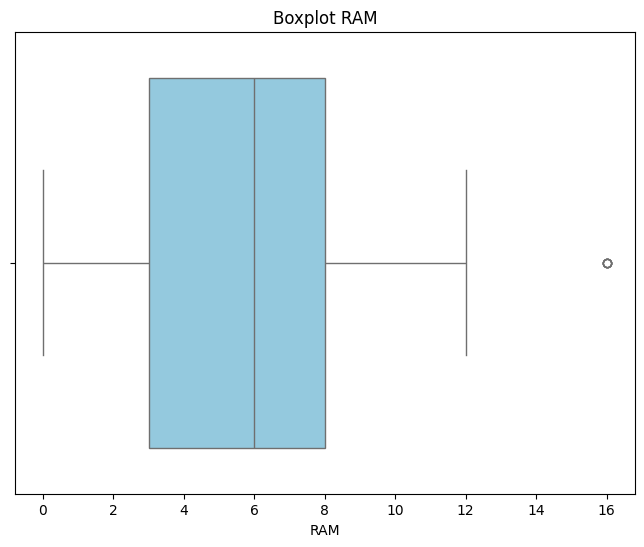

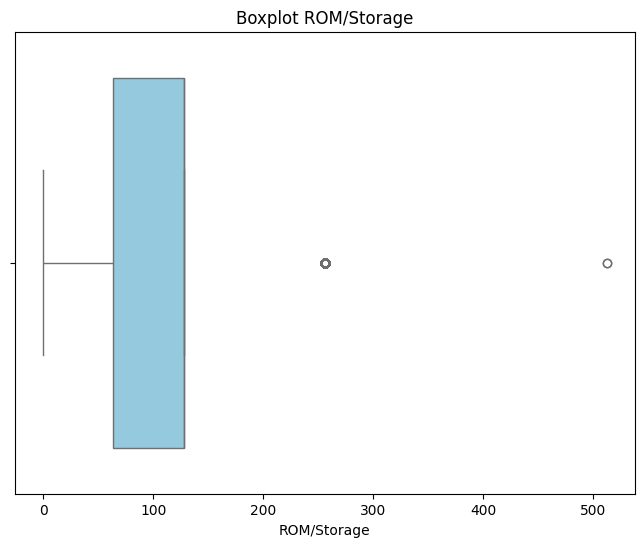

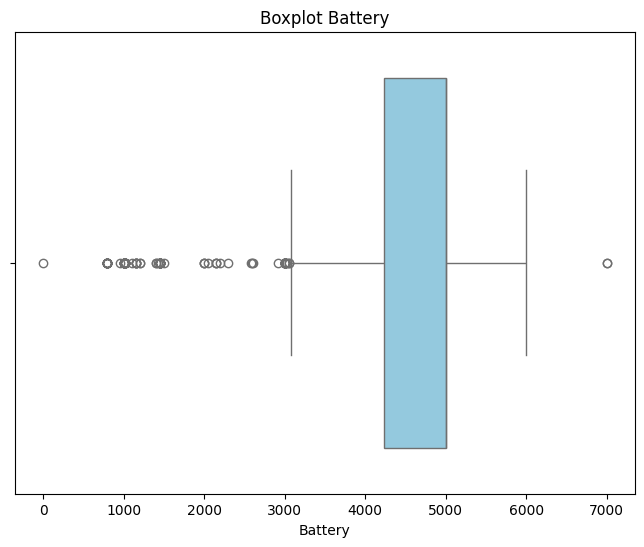

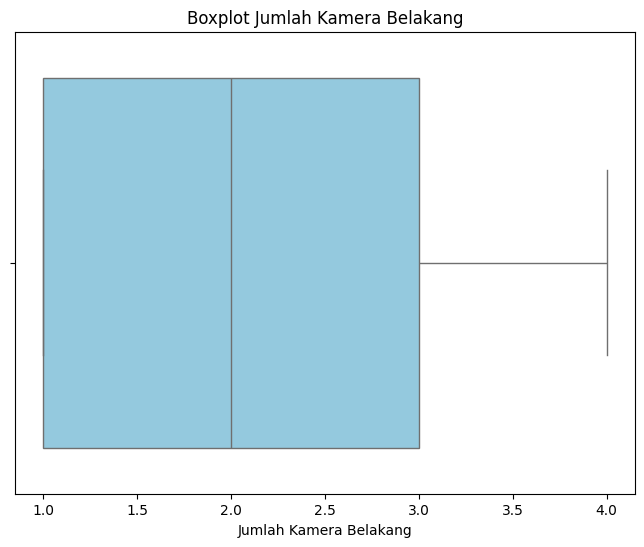

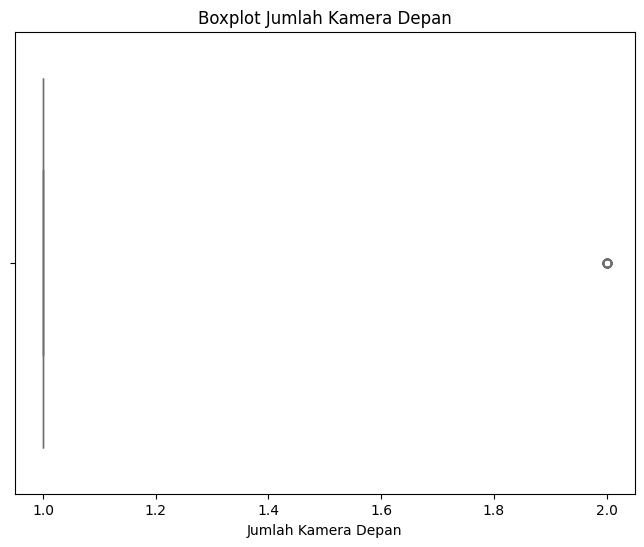

In [102]:
for column in df_num.columns :
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_num[column], color='skyblue')
    plt.xlabel(f'{column}')
    plt.title(f"Boxplot {column}")
    plt.show()

Cek skewed


In [103]:
from scipy.stats import skew

datasets_skew = []
datasets_normal = []
for column in df_num.columns:
    skew_value = skew(df[column])
    if skew_value > 0.5 or skew_value -0.5:
        datasets_skew.append(column)
    else:
        datasets_normal.append(column)

print(f"datasets skew : {datasets_skew}")    
print(f"datasets normal : {datasets_normal}")    


datasets skew : ['Rating', 'Number of Ratings', 'RAM', 'ROM/Storage', 'Battery', 'Jumlah Kamera Belakang', 'Jumlah Kamera Depan']
datasets normal : []


karena skew semua maka kita gunakan minmax scaler

In [104]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler2 = StandardScaler()



df_scaled = scaler2.fit_transform(df_num)
df_num = pd.DataFrame(df_scaled, columns=df_num.columns)

df_num.sample(5)

,Rating,Number of Ratings,RAM,ROM/Storage,Battery,Jumlah Kamera Belakang,Jumlah Kamera Depan
708,0.414068,4.534711,-0.502195,-0.564038,-1.253539,-0.097637,-0.185787
327,-0.290200,-0.371584,-0.832512,-1.004284,0.480049,-0.097637,-0.185787
312,0.238001,-0.312117,0.158441,0.316454,1.382959,1.853242,-0.185787
1034,0.238001,0.139133,-0.502195,-0.564038,0.480049,0.877803,-0.185787
394,0.238001,-0.159017,-0.502195,-0.564038,-0.215192,0.877803,-0.185787


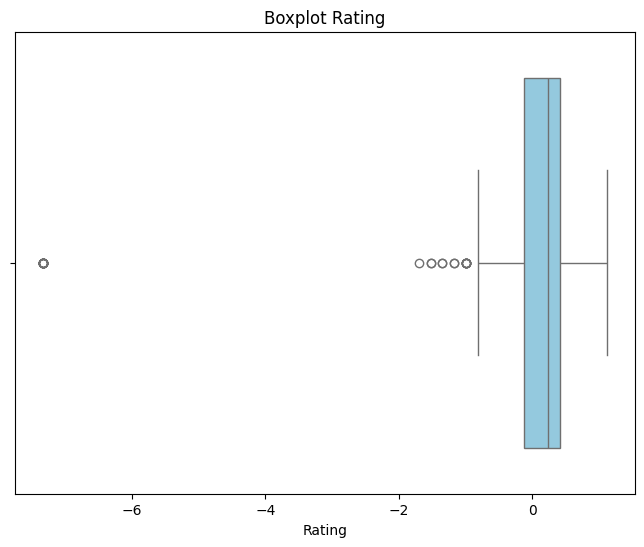

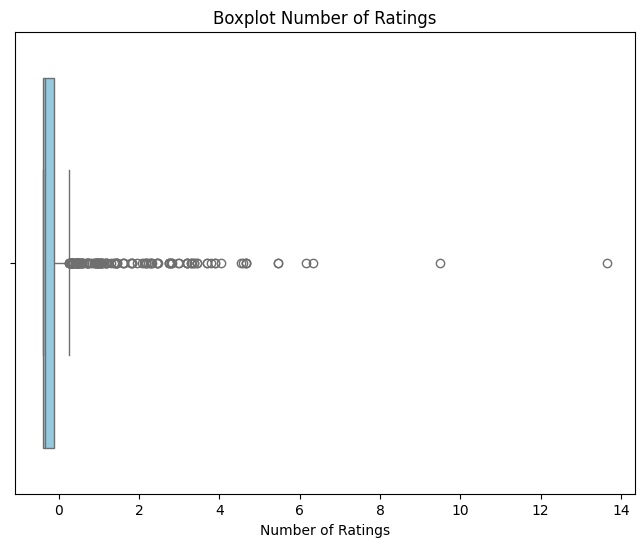

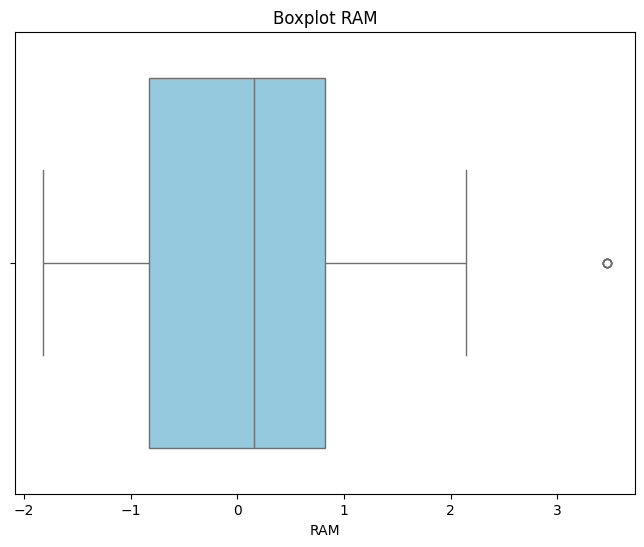

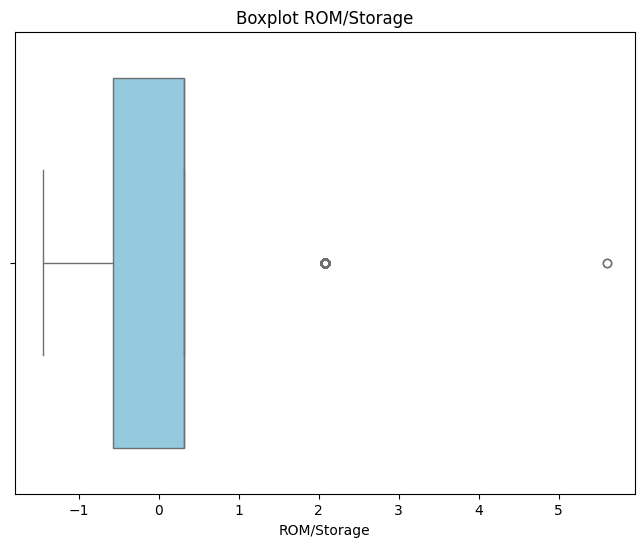

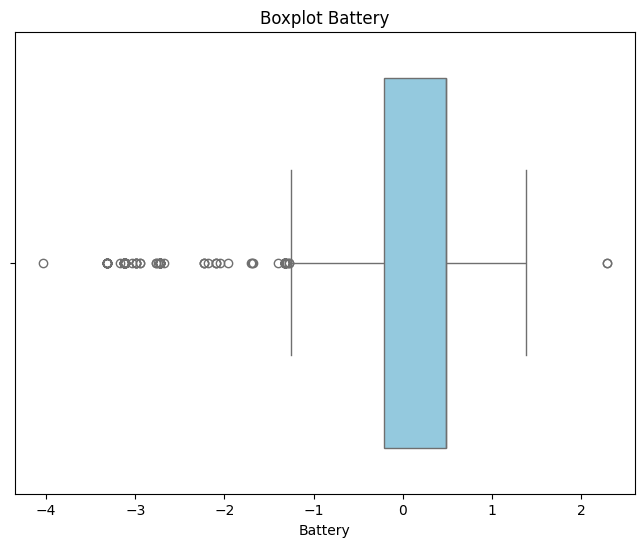

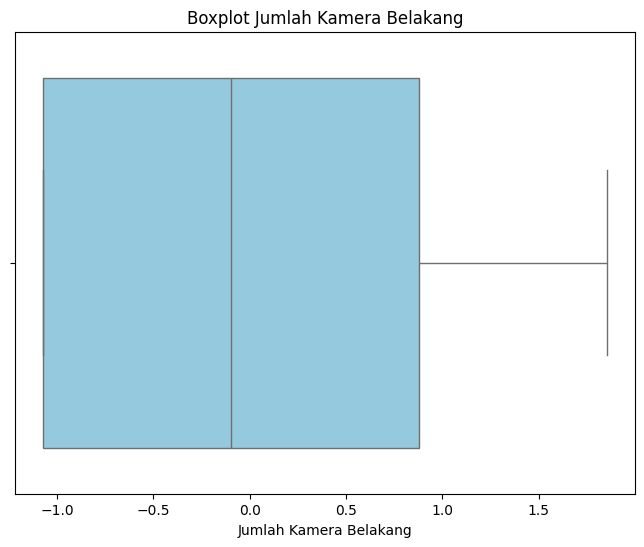

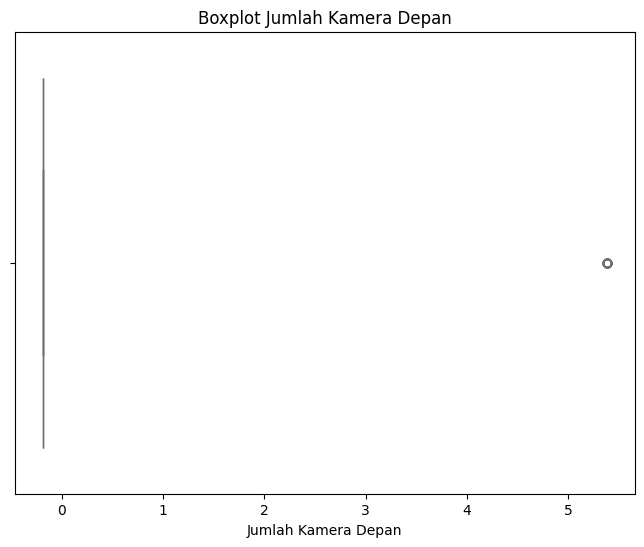

In [105]:

for column in df_num.columns :
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_num[column], color='skyblue')
    plt.xlabel(f'{column}')
    plt.title(f"Boxplot {column}")
    plt.show()

DATA Kategorikal

In [112]:
df_obj = x.select_dtypes(include='object')

df_obj.sample(5)

,Processor Brand,Phone Brand
1807,Mediatek,Infinix
1297,MediaTek,Nokia
261,Unisoc,realme
1167,Qualcomm,Redmi
785,MediaTek,OPPO


In [ ]:
df_obj.value_counts()

Processor Brand  Phone Brand
Mediatek         vivo           58
Qualcomm         vivo           47
1                OnePlus        47
                 SAMSUNG        34
Qualcomm         Redmi          33
                                ..
Turbo            vivo            1
Spreadtrum       Infinix         1
UniSoc           Infinix         1
domestic         vivo            1
one              Nokia           1
Name: count, Length: 141, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()

df_obj_scaled = OHE.fit_transform(df_obj)
Obj_cols = OHE.get_feature_names_out(input_features=df_obj.columns)
df_obj = pd.DataFrame.sparse.from_spmatrix(df_obj_scaled, columns=Obj_cols)

df_obj.sample(5)

,Processor Brand_0,Processor Brand_1,Processor Brand_12,Processor Brand_12Months,Processor Brand_18,Processor Brand_2.0,Processor Brand_2nd-gen,Processor Brand_Brand,Processor Brand_Cortex-A7,Processor Brand_Dimensity,...,Phone Brand_OnePlus,Phone Brand_POCO,Phone Brand_REDMI,Phone Brand_Realme,Phone Brand_Redmi,Phone Brand_SAMSUNG,Phone Brand_Xiaomi,Phone Brand_realme,Phone Brand_vivo,Phone Brand_�9A
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
